<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2024 @ Authors</i></b><br/>
        作者：<a style="font-weight:bold" href="mailto:bshan@mail.hust.edu.cn">斯坦福大厨 📨 </a><br>
        日期：2024-03-28<br/>
        <img src="https://github.com/stanfordbshan/CompMatBook/blob/main/author.png?raw=true" width="100"/>
        共享协议：本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i><br/>
    </p>
</div>

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学--从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](http://www.materialssimulation.com/book)，您也可以跟着up主[无人问津晦涩难懂的B站视频](https://space.bilibili.com/1111135013/channel/collectiondetail?sid=1458375)一起进行学习。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神




如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。

# 目录（对应《计算材料学》章节8.5.2）

<a href="https://item.jd.com/14285722.html"><img src="https://github.com/stanfordbshan/CompMatBook/blob/main/cover.png?raw=true"  width="200"/></a>
<a href="https://item.jd.com/14285722.html">点击购书</a>

* [Ising模型简介](#ising)
* [二维Ising解析解](#analytical)
* [Python实现](#python)
* [角度项拓展](#extension)
* [参考资料](#references)

<a name="ising"></a>
## 1. Ising模型

一个有趣且非平凡的马尔可夫链蒙特卡洛（MCMC）应用实例是在物理学和材料科学中模拟磁性系统，尤其是伊辛模型（Ising Model）。伊辛模型是统计物理学中最著名的模型之一，用于研究铁磁材料中的相变，如铁磁到顺磁的转变。

在物理量平衡状态下计算统计平均值的高效方法是，通过随机抽样代替对所有微观状态的统计求和。这通常被称为“蒙特卡罗方法”。例如，在伊辛模型中，微观状态的总数随着自旋数的增加而增加。因此，严格按照定义计算期望值在实践中是不可能的。在马尔可夫链蒙特卡罗方法中，定义了一个随机过程，以满足遍历条件和平衡条件。这种方式生成的微观状态的时间平均值应等于平衡状态下的热平均值。接近临界点或具有挫折的系统常常存在慢放松问题。有许多技术被设计用来解决这个问题，例如扩展集合方法和变分蒙特卡罗方法。

我们可以使用Metropolis-Hastings算法来模拟伊辛模型，尤其是计算不同温度下的总磁化。在这个过程中，我们选择随机的自旋并尝试翻转它，根据Metropolis准则接受或拒绝这个改变。这个准则基于能量变化和系统温度。

### 伊辛模型简介

伊辛模型由一系列位于晶格点上的自旋组成，每个自旋只能取 $ +1 $ 或 $ -1 $ 的值（分别代表向上和向下）。在最简单的形式中，相邻自旋之间有相互作用，其能量由以下公式给出：
$$ E = -J \sum_{\text{neighbours}} s_i s_j $$
其中，$ s_i $ 和 $ s_j $ 是相邻自旋，$ J $ 是相互作用常数。当 $ J > 0 $ 时，系统倾向于自旋对齐以降低能量，从而产生铁磁性。


<a name="analytical"></a>
## 2. 二维伊辛模型的昂萨格解

对于二维伊辛模型，我们可以使用昂萨格的解来估计临界温度 \( T_c \)。这个临界温度是系统从有序相（自发磁化）到无序相（无磁化）转变的点。昂萨格的解涉及复杂的数学计算，通常不用于日常的物理模拟比较。昂萨格的公式给出的临界温度是：

$$ k_B T_c = \frac{2J}{\ln(1 + \sqrt{2})} $$

在您给出的参数下，$ J = 1 $（相互作用强度）和 $ k_B $（玻尔兹曼常数，通常设为1以简化计算），我们可以计算临界温度 \( T_c \)。将这些值代入昂萨格公式中：

$ T_c = \frac{2 \times 1}{\ln(1 + \sqrt{2})} \approx 2.3 $

计算这个表达式可以得到临界温度。让我们来计算它：

二维伊辛模型的临界温度 $ T_c $ 大约为 2.269 K。这意味着在这个温度以上，系统将从有序相（铁磁性）过渡到无序相（顺磁性）。在您给出的参数（晶格大小20x20，相互作用强度 $ J = 1 $）下，当温度低于这个临界值时，系统倾向于显示出自发的磁化行为；而在临界温度以上，则趋向于无序状态。

### 模拟与解析结果的比较

由于一维模型的磁化总是零，而昂萨格解过于复杂，通常在进行伊辛模型模拟时，我们会更多地依赖于与数值实验或模拟的定性比较，而不是寻求精确的解析验证。例如，可以观察模拟中是否出现了相变行为，以及临界温度附近的系统行为是否与理论预测一致。在二维模型的情况下，特别是在临界点附近，这种比较是非常有启发性的。

以下是用Python实现的简单二维伊辛模型的Metropolis-Hastings模拟。在这个模拟中，我们计算了一个二维伊辛模型在特定温度下随时间的总磁化变化。通过改改变温度参数，我们可以观察到不同温度下的相变行为，如铁磁到顺磁的转变。这种模拟在物理学和材料科学中是非常有价值的，因为它帮助我们理解和预测复杂系统的行为。

## 3. 二维Ising的Python实现

在临界温度以下，处于稳态的马尔科夫链在理论上确实可以收敛到全自旋向上或全自旋向下的状态，这两种状态在统计物理学上是等价的。然而，在实际的马尔可夫链蒙特卡洛（MCMC）模拟中，观察到从一种状态转换到另一种状态（即从所有自旋向上转换到所有自旋向下，或反之）是非常罕见的，原因如下：

1. **长时间尺度**：在模拟中，从一种状态转换到另一种状态（比如从所有自旋向上到所有自旋向下）需要非常长的时间。这种转换涉及系统中几乎所有自旋的翻转，这在短时间尺度的模拟中几乎不可能发生。

2. **能量壁垒**：在较低温度下，两种状态之间存在较高的能量壁垒。要从一种状态过渡到另一种，系统需要先经历较高能量的中间状态，这在温度较低时非常不可能。

3. **算法的局限性**：Metropolis-Hastings算法和其他MCMC方法在探索状态空间时可能会遇到效率问题，特别是在面临高能量壁垒时。这意味着即使理论上系统可以访问所有状态，但在实际模拟中可能很难观察到从一种极端状态（全自旋向上）过渡到另一种极端状态（全自旋向下）。

接下来我们用Python来实现一下二维Ising模型：

#### 3.1 Ising模型能量

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def ising_model_energy(state, J):
    """Calculate the total energy of the Ising model."""
    energy = 0
    for i in range(len(state)):
        for j in range(len(state[i])):
            S = state[i, j]
            # Sum over neighbors using periodic boundary conditions
            nb = state[(i+1)%len(state), j] + state[i, (j+1)%len(state[i])] + state[(i-1)%len(state), j] + state[i, (j-1)%len(state[i])]
            energy += - nb * S
    return J * energy / 2  # Each pair is counted twice


In [ ]:
ising_model_energy(np.array([[1,1],[1,1]]),1.0)

-8.0

In [ ]:
ising_model_energy(np.array([[1,-1],[-1,-1]]),1.0)

0.0

#### 3.2 Ising模型总磁矩

In [ ]:
def ising_model_magnetization(state):
    """Calculate the total magnetization"""
    return np.abs(state.sum())

In [ ]:
ising_model_magnetization(np.array([[1,-1],[-1,1]]))

0

#### 3.3 Metropolis步

In [ ]:
def metropolis_step(state, beta, J):
    """Perform one Metropolis step in the Ising model."""
    x = np.random.randint(0, state.shape[0])
    y = np.random.randint(0, state.shape[1])
    S = state[x, y]
    # Sum over neighbors using periodic boundary conditions
    nb = state[(x+1)%state.shape[0], y] + state[x, (y+1)%state.shape[1]] + state[(x-1)%state.shape[0], y] + state[x, (y-1)%state.shape[1]]
    delta_E = 2 * J * S * nb
    if delta_E < 0 or np.random.rand() < np.exp(-delta_E * beta):
        state[x, y] *= -1
    return state

#### 3.4 Ising模型蒙特卡洛

In [ ]:
def simulate_ising_model(size, temperature, J, steps, burn_in, visualize_steps=1000):
    """Simulate the Ising model and visualize the evolution."""
    state = 2*np.random.randint(2, size=(size, size))-1  # Random initial state
    beta = 1.0/temperature
    magnetizations = []
    energies = []
    ave_E = 0.0
    ave_M = 0.0

    for i in range(steps):
        state = metropolis_step(state, beta, J)
        energy = ising_model_energy(state, J)
        magnetization = ising_model_magnetization(state)
        energies.append(energy)
        magnetizations.append(magnetization)
        if i > burn_in:  #do some statistics
            ave_E = (i-burn_in-1)*ave_E/(i-burn_in) + energy/(i - burn_in)
            ave_M = (i-burn_in-1)*ave_M/(i-burn_in) + magnetization/(i - burn_in)

        if i % visualize_steps == 0 and visualize_steps >=0: # visualize_step<0 means no visualization
            print(f'==== visualizing {i}====')
            plt.figure(figsize=(4, 4))
            plt.imshow(state, cmap='coolwarm', interpolation='nearest')
            plt.title(f'Step {i}')
            plt.axis('off')
            plt.tight_layout()
            plt.show()

    return ave_E, ave_M, energies, magnetizations

平均能量 = -1.7510484435491873
平均磁矩 = 0.9100187145530794


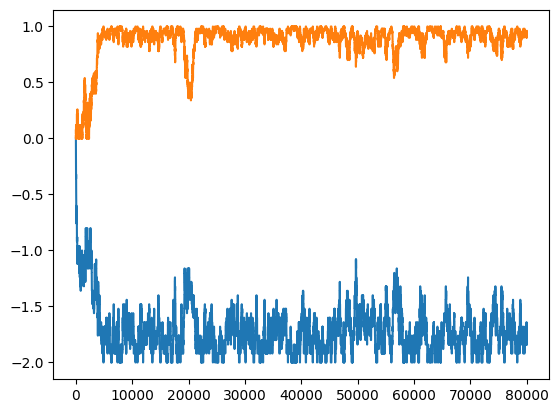

In [ ]:
def main():
    # Simulation parameters
    size = 10  # Size of the lattice, NxN
    temperature = 2.0  # Temperature
    J = 1  # Interaction strength
    steps = 80000  # Number of Metropolis steps
    burn_in = 10000
    visualize_steps = 1000  # Interval for visualization

    ave_E, ave_M, energies, magnetizations = simulate_ising_model(size, temperature, J, steps, burn_in, visualize_steps)
    print(f'平均能量 = {ave_E/size**2}')
    print(f'平均磁矩 = {ave_M/size**2}')

    per_atom_E = [energy/size**2 for energy in energies]
    per_atom_M = [magnetization/size**2 for magnetization in magnetizations]
    plt.plot(per_atom_E)
    plt.plot(per_atom_M)

if __name__ == '__main__':
    main()

#### 3.5 物理量随温度变化规律

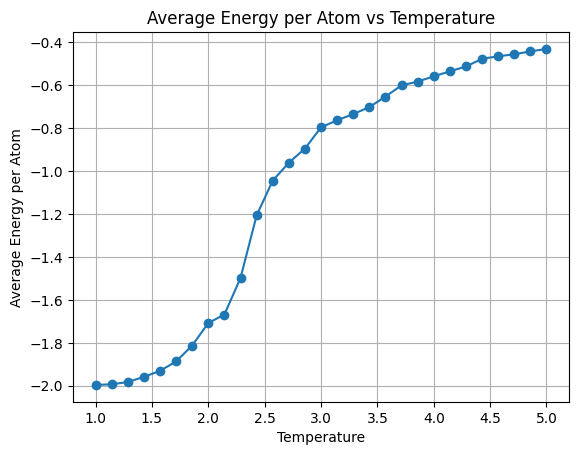

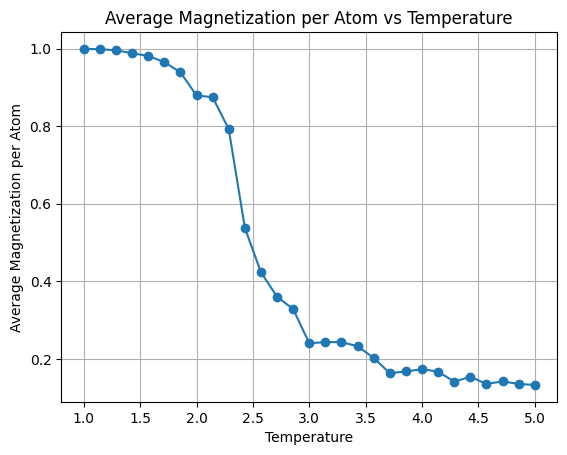

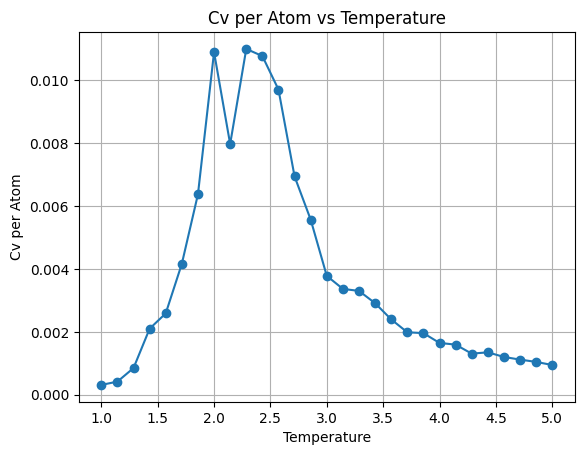

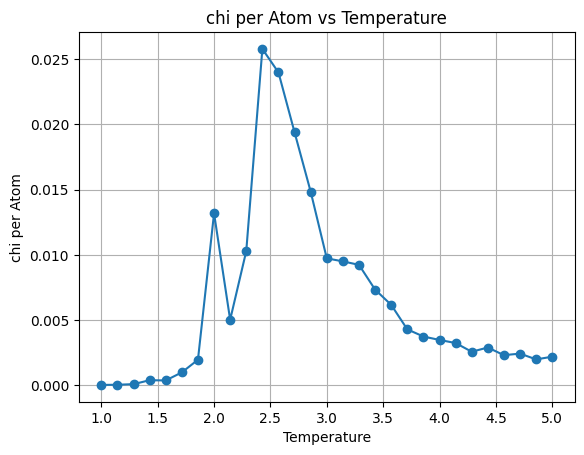

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Properties_vs_T():
    # Simulation parameters
    size = 10  # Size of the lattice, NxN
    J = 1  # Interaction strength
    steps = 80000  # Number of Metropolis steps
    burn_in = 10000
    visualize_steps = -1  # Interval for visualization

    temperatures = np.linspace(1, 5, 29)  # Temperatures from 1 to 5
    ave_E_per_temp = []  # List to store average energy for each temperature
    ave_M_per_temp = []
    Cv_per_temp = []
    chi_per_temp = []

    for temperature in temperatures:
        ave_E, ave_M, energies, magnetizations = simulate_ising_model(size, temperature, J, steps, burn_in, visualize_steps)
        ave_E_per_temp.append(ave_E / size**2)  # Record per-atom average energy
        ave_M_per_temp.append(ave_M / size**2)  # Record per-atom average energy
        Cv_per_temp.append(np.var(energies[burn_in+1:])/temperature**2/size**4)
        chi_per_temp.append(np.var(magnetizations[burn_in+1:])/temperature/size**4)

    # Plot average energy per atom vs temperature
    plt.figure()
    plt.plot(temperatures, ave_E_per_temp, marker='o')
    plt.xlabel('Temperature')
    plt.ylabel('Average Energy per Atom')
    plt.title('Average Energy per Atom vs Temperature')
    plt.grid(True)
    plt.show()

    # Plot average magnetization vs temperature
    plt.figure()
    plt.plot(temperatures, ave_M_per_temp, marker='o')
    plt.xlabel('Temperature')
    plt.ylabel('Average Magnetization per Atom')
    plt.title('Average Magnetization per Atom vs Temperature')
    plt.grid(True)
    plt.show()

    # Plot Cv
    plt.figure()
    plt.plot(temperatures, Cv_per_temp, marker='o')
    plt.xlabel('Temperature')
    plt.ylabel('Cv per Atom')
    plt.title('Cv per Atom vs Temperature')
    plt.grid(True)
    plt.show()

    # Plot chi
    plt.figure()
    plt.plot(temperatures, chi_per_temp, marker='o')
    plt.xlabel('Temperature')
    plt.ylabel('chi per Atom')
    plt.title('chi per Atom vs Temperature')
    plt.grid(True)
    plt.show()

Properties_vs_T()


In [ ]:
pip install imageio

In [ ]:
#@title gif animation
import numpy as np
import matplotlib.pyplot as plt
import imageio

def gif_animation_ising_model(size, temperature, J, steps, burn_in, visualize_steps=1000):
    """Simulate the Ising model and visualize the evolution as a GIF."""
    state = 2*np.random.randint(2, size=(size, size))-1  # Random initial state
    beta = 1.0/temperature
    energies = []
    ave_E = 0.0
    frames = []  # To store frames for the GIF

    # Prepare the writer object using FFMPEG and specify the fps
    writer = imageio.get_writer('ising_model_simulation.mp4', fps=5)

    for i in range(steps):
        state = metropolis_step(state, beta, J)
        energy = ising_model_energy(state, J)
        energies.append(energy)
        if i > burn_in:
            ave_E = (i-burn_in-1)*ave_E/(i-burn_in) + energy/(i - burn_in)

        if i % visualize_steps == 0 and visualize_steps >= 0:
            print(f'==== Collecting frame {i} ====')
            fig, ax = plt.subplots(figsize=(4, 4))
            ax.imshow(state, cmap='coolwarm', interpolation='nearest')
            ax.set_title(f'Step {i}')
            ax.axis('off')
            fig.tight_layout()

            # Save the current figure's frame
            plt.savefig('frame.png')
            plt.close(fig)  # Close the figure to prevent it from displaying
            frames.append(imageio.imread('frame.png'))

    # Create GIF
    imageio.mimsave('ising_model_simulation.gif', frames, fps=2)

    return ave_E, energies

# Replace `metropolis_step` and `ising_model_energy` with your actual implementation
gif_animation_ising_model(20, temperature=2.0, J=1.0, steps=100000, burn_in=0, visualize_steps=1000)

In [ ]:
#@title video animation
import numpy as np
import matplotlib.pyplot as plt
import imageio

def simulate_ising_model_to_video(size, temperature, J, steps, burn_in, visualize_steps=1000):
    """Simulate the Ising model and visualize the evolution as a video."""
    state = 2*np.random.randint(2, size=(size, size))-1  # Random initial state
    beta = 1.0/temperature
    energies = []
    ave_E = 0.0

    # Prepare the writer object using FFMPEG and specify the fps
    writer = imageio.get_writer('ising_model_simulation.mp4', fps=2)

    for i in range(steps):
        state = metropolis_step(state, beta, J)
        energy = ising_model_energy(state, J)
        energies.append(energy)
        if i > burn_in:
            ave_E = (i-burn_in-1)*ave_E/(i-burn_in) + energy/(i - burn_in)

        if i % visualize_steps == 0 and visualize_steps >= 0:
            print(f'==== Collecting frame {i} ====')
            fig, ax = plt.subplots(figsize=(4, 4))
            ax.imshow(state, cmap='coolwarm', interpolation='nearest')
            ax.set_title(f'Step {i}')
            ax.axis('off')
            fig.canvas.draw()  # Draw the figure

            # Convert the figure to a numpy array, close it to save memory
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)

            # Append the image array to the video
            writer.append_data(image)

    # Close the writer to finish writing the video file
    writer.close()

# Note: Ensure you have the metropolis_step and ising_model_energy functions defined
simulate_ising_model_to_video(20, temperature=4.0, J=1.0, steps=50000, burn_in=0, visualize_steps=500)

<a name="extension"></a>
## 4. 拓展：包含角度项的Ising模型

模拟系统状态随着温度的演化过程。
具体参考链接：http://wiki.swarma.net/index.php/ISING%E6%A8%A1%E5%9E%8B

体系大小： (30, 30)
系统的初始能量是: 5.293768332928827
循环次数1, 当前系统能量是: -150.17137400205522
循环次数101, 当前系统能量是: -553.2225010470003
循环次数201, 当前系统能量是: -506.96780307680893
循环次数301, 当前系统能量是: -510.86169049171974
循环次数401, 当前系统能量是: -475.7006573153604
循环次数501, 当前系统能量是: -505.15901206753955
循环次数601, 当前系统能量是: -477.39188400804187
循环次数701, 当前系统能量是: -521.5292392242349
循环次数801, 当前系统能量是: -522.7017361361177
循环次数901, 当前系统能量是: -495.72690976578696
循环次数1000, 当前系统能量是: -528.7123171312601


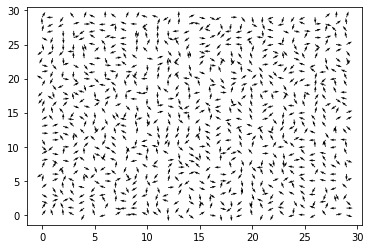

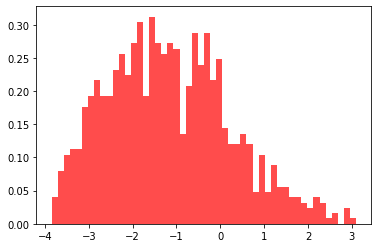

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import time


def main():
    size = 30  # 体系大小
    T = 2  # 温度
    ising = get_one_sample(sizeOfSample=size, temperature=T)  # 得到符合玻尔兹曼分布的ising模型
    plot(ising)  # 画图
    energy_s = []
    for i in range(size):
        for j in range(size):
            energy_s0 = getEnergy(i=i, j=j, S=ising)  # 获取格点的能量
            energy_s = np.append(energy_s, [energy_s0], axis=0)
    plt.hist(energy_s, bins=50, density=1, facecolor='red', alpha=0.7)  # 画出格点能量分布  # bins是分布柱子的个数，density是归一化，后面两个参数是管颜色的
    plt.show()


def get_one_sample(sizeOfSample, temperature):
    S = 2 * np.pi * np.random.random(size=(sizeOfSample, sizeOfSample))  # 随机初始状态，角度是0到2pi
    print('体系大小：', S.shape)
    initialEnergy = calculateAllEnergy(S)  # 计算随机初始状态的能量
    print('系统的初始能量是:', initialEnergy)
    newS = np.array(copy.deepcopy(S))
    for i00 in range(1000):  # 循环一定次数，得到平衡的抽样分布
        newS = Metropolis(newS, temperature)  # Metropolis方法抽样，得到玻尔兹曼分布的样品体系
        newEnergy = calculateAllEnergy(newS)
        if np.mod(i00, 100) == 0:
            print('循环次数%i, 当前系统能量是:' % (i00+1), newEnergy)
    print('循环次数%i, 当前系统能量是:' % (i00 + 1), newEnergy)
    return newS


def Metropolis(S, T):  # S是输入的初始状态， T是温度
    delta_max = 0.5 * np.pi # 角度最大的变化度数，默认是90度，也可以调整为其他
    k = 1  # 玻尔兹曼常数
    for i in range(S.shape[0]):
        for j in range(S.shape[0]):
            delta = (2 * np.random.random() - 1) * delta_max   # 角度变化在-90度到90度之间
            newAngle = S[i, j] + delta  # 新角度
            energyBefore = getEnergy(i=i, j=j, S=S, angle=None)  # 获取该格点的能量
            energyLater = getEnergy(i=i, j=j, S=S, angle=newAngle)  # 获取格点变成新角度时的能量
            alpha = min(1.0, math.exp(-(energyLater - energyBefore)/(k * T)))  # 这个接受率对应的是玻尔兹曼分布
            if random.uniform(0, 1) <= alpha:
                S[i, j] = newAngle   # 接受新状态
            else:
                pass  # 保持为上一个状态
    return S


def getEnergy(i, j, S, angle=None):  # 计算(i,j)位置的能量，为周围四个的相互能之和
    width = S.shape[0]
    height = S.shape[1]
    top_i = i - 1 if i > 0 else width - 1  # 用到周期性边界条件
    bottom_i = i + 1 if i < (width - 1) else 0
    left_j = j - 1 if j > 0 else height - 1
    right_j = j + 1 if j < (height - 1) else 0
    environment = [[top_i, j], [bottom_i, j], [i, left_j], [i, right_j]]
    energy = 0
    if angle == None:
        for num_i in range(4):
            energy += -np.cos(S[i, j] - S[environment[num_i][0], environment[num_i][1]])
    else:
        for num_i in range(4):
            energy += -np.cos(angle - S[environment[num_i][0], environment[num_i][1]])
    return energy


def calculateAllEnergy(S):  # 计算整个体系的能量
    energy = 0
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            energy += getEnergy(i, j, S)
    return energy/2  # 作用两次要减半


def plot(S):  # 画图
    X, Y = np.meshgrid(np.arange(0, S.shape[0]), np.arange(0, S.shape[0]))
    U = np.cos(S)
    V = np.sin(S)
    plt.figure()
    plt.quiver(X, Y, U, V, units='inches')
    plt.show()


if __name__ == '__main__':
    main()

<a name="references"></a>
## 参考资料

- [Solving the 1D Ising Model](https://stanford.edu/~jeffjar/statmech/lec4.html)
- [One and two dimensional Ising Models](https://www.thphys.uni-heidelberg.de/~wolschin/statsem21_3s.pdf)
- [Statistical Mechanics - Ising Model : The One Dimensional Ising Model](https://www.youtube.com/watch?v=xzkPZ2reHTg)
- [Statistical Mechanics - Ising Model : B W Approximation / Ising Model in Zeroth Approximation - 2](https://www.youtube.com/watch?v=JLf8tM_4oJ4)